<a href="https://colab.research.google.com/github/ehsung/PUBH6886/blob/main/PUBH6886_Homework_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PUBH 6886 Homework 1
## Completed by Edward Sung
## Completed on 9/17/24

Completed homwework using python google colab

>[Question 1 - Part I](#scrollTo=KHw_mDN4pwCF)

>>[Packages](#scrollTo=qoRJgvr4pkHg)

>>[Load in Data](#scrollTo=pHiAQ3D0po6A)

>>[(a)](#scrollTo=V27WaRf0fwcb)

>>[(b)](#scrollTo=IceRV-DGks1W)

>>[(c)](#scrollTo=SmjeCKrfA2Qm)

>>[(d)](#scrollTo=7biEhlr-KdFj)

>[Question 1 - Part II](#scrollTo=7OJ7JJBaIwWB)

>>[(a)](#scrollTo=To9tUJLNNQRh)

>>[(f)](#scrollTo=LDlAYrp5_ycU)

>>[(g)](#scrollTo=nkYqJwToUPJq)

>[Question 2](#scrollTo=bIkqbepFi4YQ)

>>[(a)](#scrollTo=Mq92ktoFvMbf)

>>[(b)](#scrollTo=ldXltlPA06ct)

>>[(c)](#scrollTo=GhUtfnOf3hUT)

>>[(d)](#scrollTo=poCaBNC54AuZ)

>>[(e)](#scrollTo=qLWOOsqy4_O2)

>>[(f)](#scrollTo=jVMJr7XL5VTY)

>>[(g)](#scrollTo=jwN69Y6j7PMG)

>>[(h)](#scrollTo=mWs5-N4A9XLs)

>>[(i)](#scrollTo=FxIggBug_lYL)

>>[(j)](#scrollTo=Kx08EXYUGyc1)

>>[(k)](#scrollTo=HcHEl1zrIGOn)



# Question 1 - Part I

## Packages

In [345]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

## Load in Data

In [346]:
# Load in data
datafile = "/content/bdiag.csv"
rawData = pd.read_csv(datafile)

rawData.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [347]:
# See data types
rawData.dtypes

,0
id,int64
diagnosis,object
radius_mean,float64
texture_mean,float64
perimeter_mean,float64
area_mean,float64
smoothness_mean,float64
compactness_mean,float64
concavity_mean,float64
concave points_mean,float64


In [348]:
# Drop id, since this is not a feature data
# Drop diagnosis, since this isnt part of the mean, se, worst measurements
unscaled_data = rawData.drop(columns=['id', 'diagnosis'])
unscaled_data.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

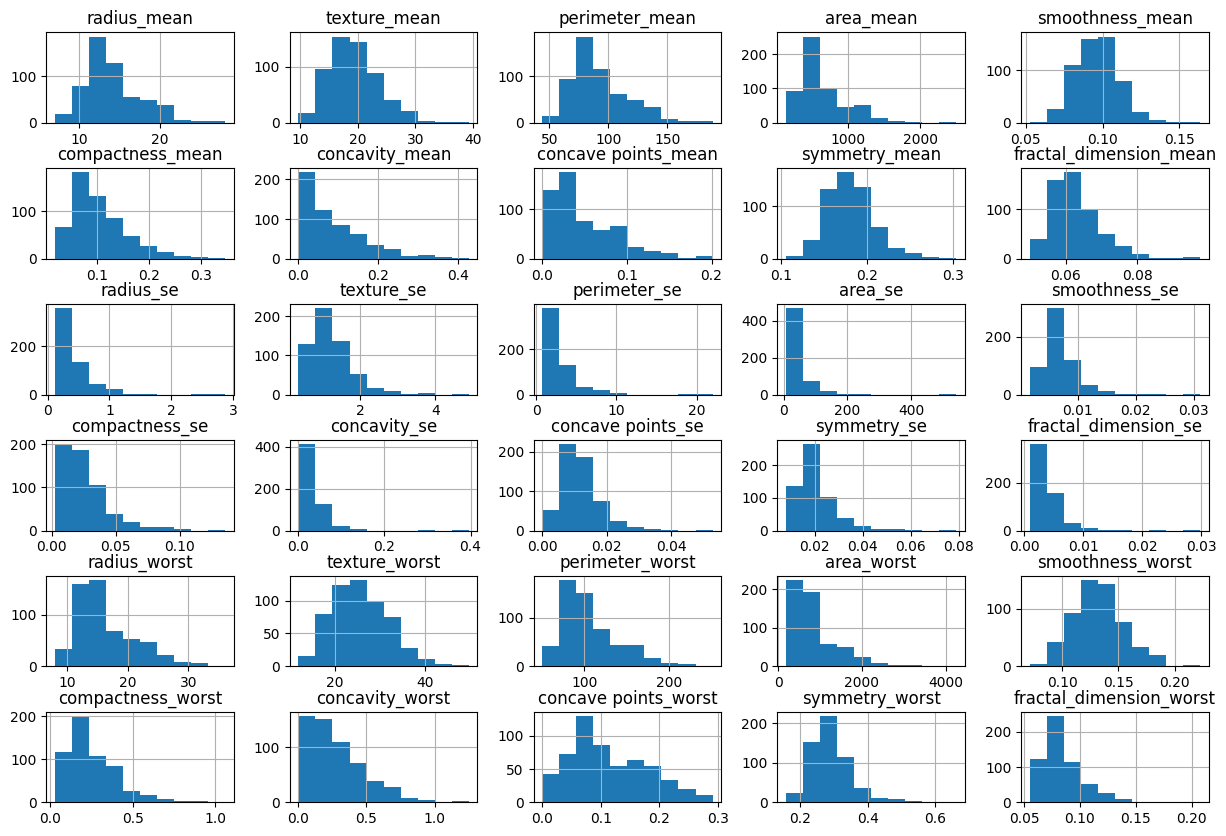

In [349]:
# Quick histogram of the measurements on the unscaled data
numData = unscaled_data.select_dtypes('float64')

numData.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);
plt.show()

## (a)

In [350]:
# mean of data
unscaled_data.mean()

,0
radius_mean,14.127292
texture_mean,19.289649
perimeter_mean,91.969033
area_mean,654.889104
smoothness_mean,0.096360
compactness_mean,0.104341
concavity_mean,0.088799
concave points_mean,0.048919
symmetry_mean,0.181162
fractal_dimension_mean,0.062798


In [351]:
# Variance of Data
unscaled_data.var()

,0
radius_mean,12.418920
texture_mean,18.498909
perimeter_mean,590.440480
area_mean,123843.554318
smoothness_mean,0.000198
compactness_mean,0.002789
concavity_mean,0.006355
concave points_mean,0.001506
symmetry_mean,0.000752
fractal_dimension_mean,0.000050


In [352]:
# Perform PCA on the unscaled Data
unscaled_data_PCA = PCA()

unscaled_data_PCA.fit(unscaled_data)

PCA()

In [353]:
# Plot the PCA components variance explained
%%capture
fig , axes = plt.subplots(1, 2, figsize=(15, 6))
ticks = np.arange(unscaled_data_PCA.n_components_)+1
ax = axes[0]
ax.plot(ticks,
        unscaled_data_PCA.explained_variance_ratio_ ,
        marker='o')
ax.set_xlabel('Principal Component');
ax.set_ylabel('Proportion of Variance Explained')
ax.set_ylim([0,1])
ax.set_xticks(ticks)

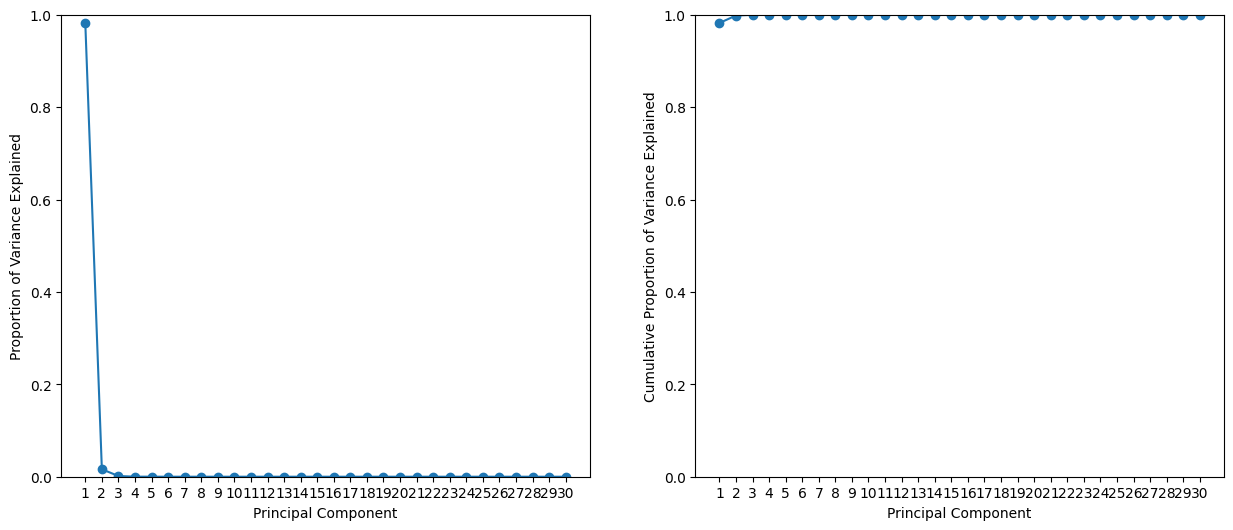

In [354]:
ax = axes[1]
ax.plot(ticks,
        unscaled_data_PCA.explained_variance_ratio_.cumsum(),
        marker='o')
ax.set_xlabel('Principal Component')
ax.set_ylabel('Cumulative Proportion of Variance Explained')
ax.set_ylim([0, 1])
ax.set_xticks(ticks)
fig

In [355]:
# Numerical cumsum of the variance explained, starting with PC_1, PC_2, up to PC_5
unscaled_data_PCA.explained_variance_ratio_.cumsum()[:5]

array([0.98204467, 0.99822116, 0.99977867, 0.9998996 , 0.99998788])

If we want the smallest number of PCA retained for at least 75% of the variance in the data, we would use the first PCA. In fact, PC_1 actually explains 98% of the variance as seen in the second plot (right plot) and numerically in my cumsum array.

Text(0, 0.5, 'PC2')

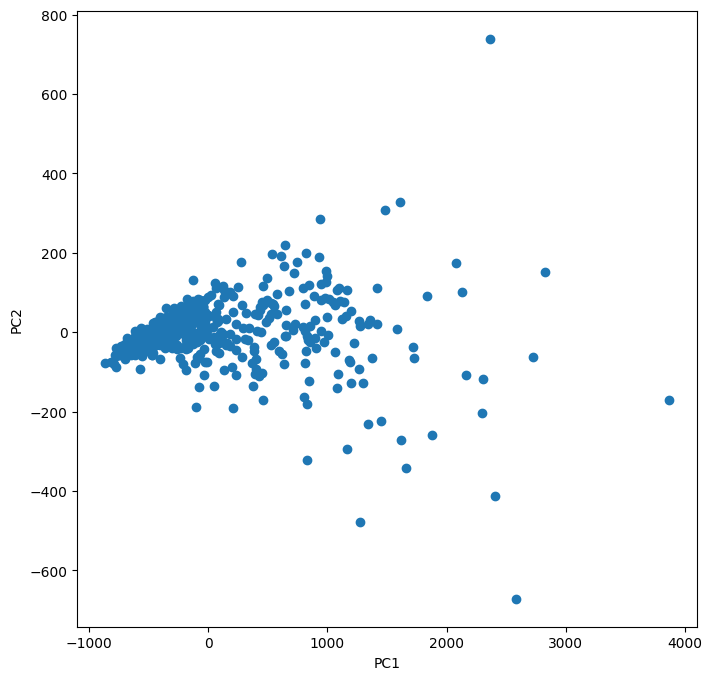

In [356]:
# Biplot of PC1 vs PC2
scores = unscaled_data_PCA.transform(unscaled_data)

i, j = 0, 1 # which components (PC1 and PC2)
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.scatter(scores[:, 0], scores[:,1])
ax.set_xlabel('PC%d' % (i+1))
ax.set_ylabel('PC%d' % (j+1))

Text(0, 0.5, 'PC2')

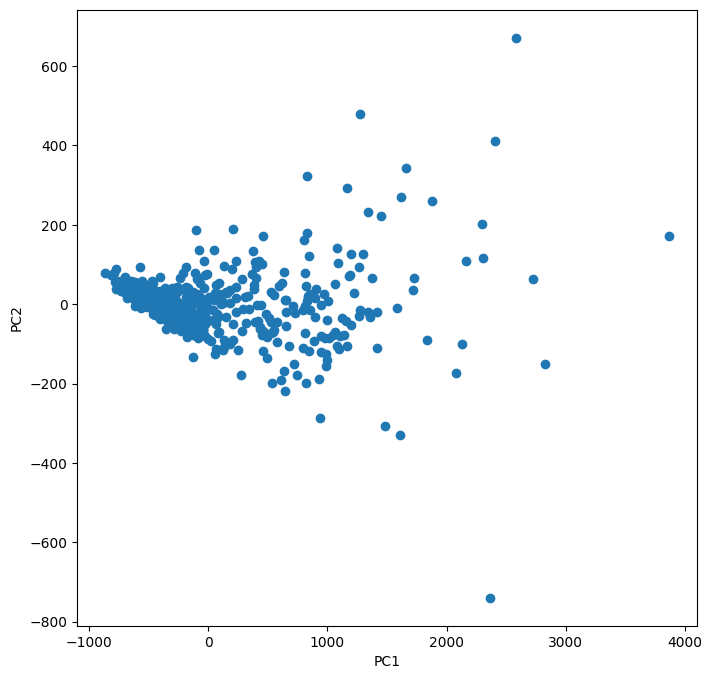

In [357]:
# Flip and plot
scale_arrow = s_ = 2
scores[:,1] *= -1
unscaled_data_PCA.components_[1] *= -1 # flip the y-axis
fig , ax = plt.subplots(1, 1, figsize=(8, 8))
ax.scatter(scores[:,0], scores[:,1])
ax.set_xlabel('PC%d' % (i+1))
ax.set_ylabel('PC%d' % (j+1))

By plotting PCA scores of the first and second components, we can see that PC1 holds essentially all of the variance within the data as seen in just the difference in axis scaling. PC2 goes up to 800, while PC1 expands to 4000. The spread can also be visually seen more in the horizontal axis than the vertical.

## (b)

In [358]:
from sklearn.preprocessing import StandardScaler

# Scale data
scaler = StandardScaler(with_std=True,
                        with_mean=True)
scaled_data = scaler.fit_transform(unscaled_data)

In [359]:
# Data is now mean 0 with variance 1
print(scaled_data.mean())
print(scaled_data.var())

-6.826538293184326e-17
1.0


In [360]:
# Perform PCA
scaled_data_PCA = PCA()

scaled_data_PCA.fit(scaled_data)

PCA()

In [361]:
# Plot the PCA components variance explained
%%capture
fig , axes = plt.subplots(1, 2, figsize=(15, 6))
ticks = np.arange(scaled_data_PCA.n_components_)+1
ax = axes[0]
ax.plot(ticks,
        scaled_data_PCA.explained_variance_ratio_ ,
        marker='o')
ax.set_xlabel('Principal Component');
ax.set_ylabel('Proportion of Variance Explained')
ax.set_ylim([0,1])
ax.set_xticks(ticks)

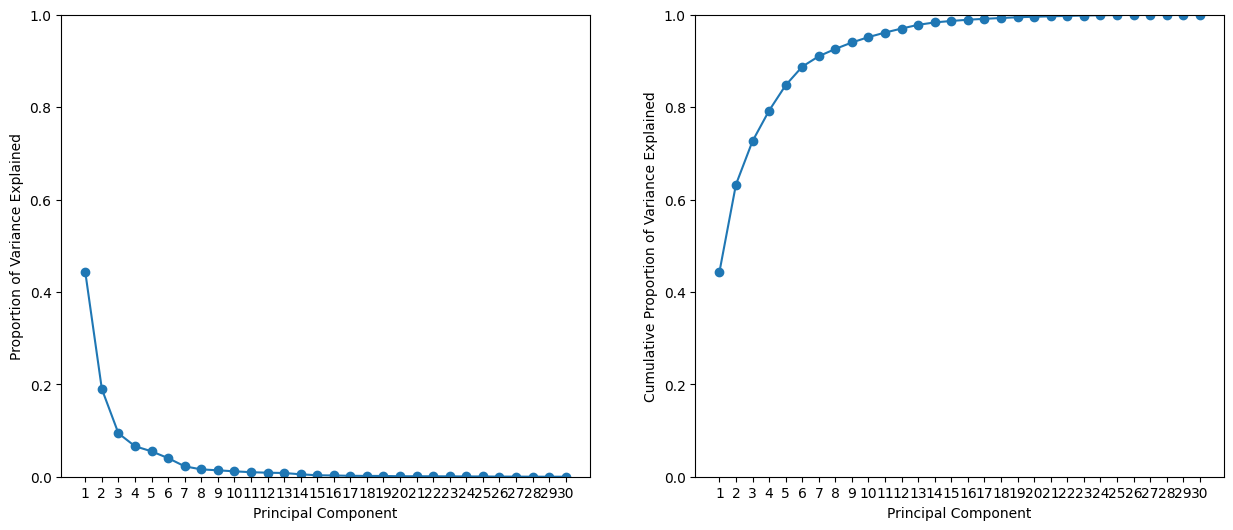

In [362]:
ax = axes[1]
ax.plot(ticks,
        scaled_data_PCA.explained_variance_ratio_.cumsum(),
        marker='o')
ax.set_xlabel('Principal Component')
ax.set_ylabel('Cumulative Proportion of Variance Explained')
ax.set_ylim([0, 1])
ax.set_xticks(ticks)
fig

In [363]:
# Numerical cumsum of the variance explained, starting with PC_1, PC_2, up to PC_5
scaled_data_PCA.explained_variance_ratio_.cumsum()[:5]

array([0.44272026, 0.63243208, 0.72636371, 0.79238506, 0.84734274])

Based on the cumulative sum explained variance ratio for the scaled PCA. You will need 4 PCs to explain at least 75% of the variance in the data. 4 PCs cumsum is 79% of the variance in the data.

## (c)

In [364]:
%%capture
# PCA scores
scores = scaled_data_PCA.transform(scaled_data)

# Plot the PCA comparisons with overlayed diagnosis
fig , axes = plt.subplots(3, 1, figsize=(5, 10))

colors = {'B': 'blue', 'M': 'red'}

# PC1 v PC2
ax = axes[0]
i, j = 0, 1 # which components (PC1 and PC2)
ax.scatter(scores[:, i], scores[:,j])
ax.set_xlabel('PC%d' % (i+1))
ax.set_ylabel('PC%d' % (j+1))

for idx, label in enumerate(rawData.diagnosis):
    ax.scatter(scores[idx, i], scores[idx, j], color=colors[label], label=label)

# PC1 v PC3
ax = axes[1]
i, j = 0, 2 # which components (PC1 and PC3)
ax.scatter(scores[:, i], scores[:,j])
ax.set_xlabel('PC%d' % (i+1))
ax.set_ylabel('PC%d' % (j+1))

for idx, label in enumerate(rawData.diagnosis):
    ax.scatter(scores[idx, i], scores[idx, j], color=colors[label], label=label)

# PC2 v PC3
ax = axes[2]
i, j = 1, 2 # which components (PC2 and PC3)
ax.scatter(scores[:, i], scores[:,j])
ax.set_xlabel('PC%d' % (i+1))
ax.set_ylabel('PC%d' % (j+1))

for idx, label in enumerate(rawData.diagnosis):
    ax.scatter(scores[idx, i], scores[idx, j], color=colors[label], label=label)

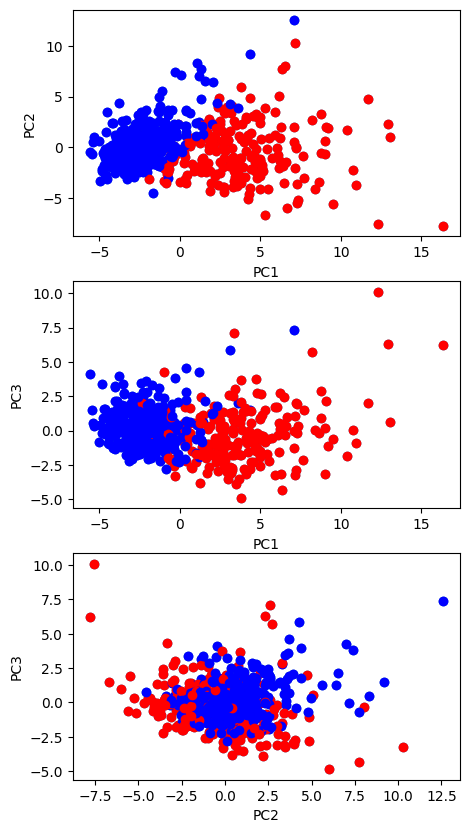

In [365]:
fig

Looking at the 3 combinations of PCs, the first two biplots that includes PC1 suggests a clean separation of diagnosis. There is a clear separation of blue dots (benign) and red dots (maligant) in both PC1 v PC2 and PC1 v PC3. But PC1 v PC2 looks to be a bit better, since in PC1 v PC3, there are some overlaps of red and blue in the middle. The separation is also mainly on the horizontal axix, which is PC1, which aligns with the first principal component capturing most of the variance.

## (d)

In [366]:
# Scale data
scaler = StandardScaler(with_std=True,
                        with_mean=True)
scaled_data = scaler.fit_transform(unscaled_data)

# Perform PCA (prcomp)
scaled_data_PCA = PCA()
scaled_data_PCA.fit(scaled_data)

# Perform Rotation
scaled_data_PCA_rotated = scaled_data_PCA.components_.T

# Compute PCA scores
scaled_data_PCA_rotated_scores = np.dot(scaled_data, scaled_data_PCA_rotated)

scaled_data_PCA_scores = scaled_data_PCA.transform(scaled_data)

# Check that they have the same scores
np.allclose(scaled_data_PCA_rotated_scores, scaled_data_PCA_scores)

True

Here this shows that PCA function and the manual rotation/inverse of the PCA components are the same thing.

# Question 1 - Part II

In [367]:
!pip install ISLP
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, cut_tree
from ISLP.cluster import compute_linkage

## (a)

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')
mean:  -6.826538293184326e-17
variance:  1.0


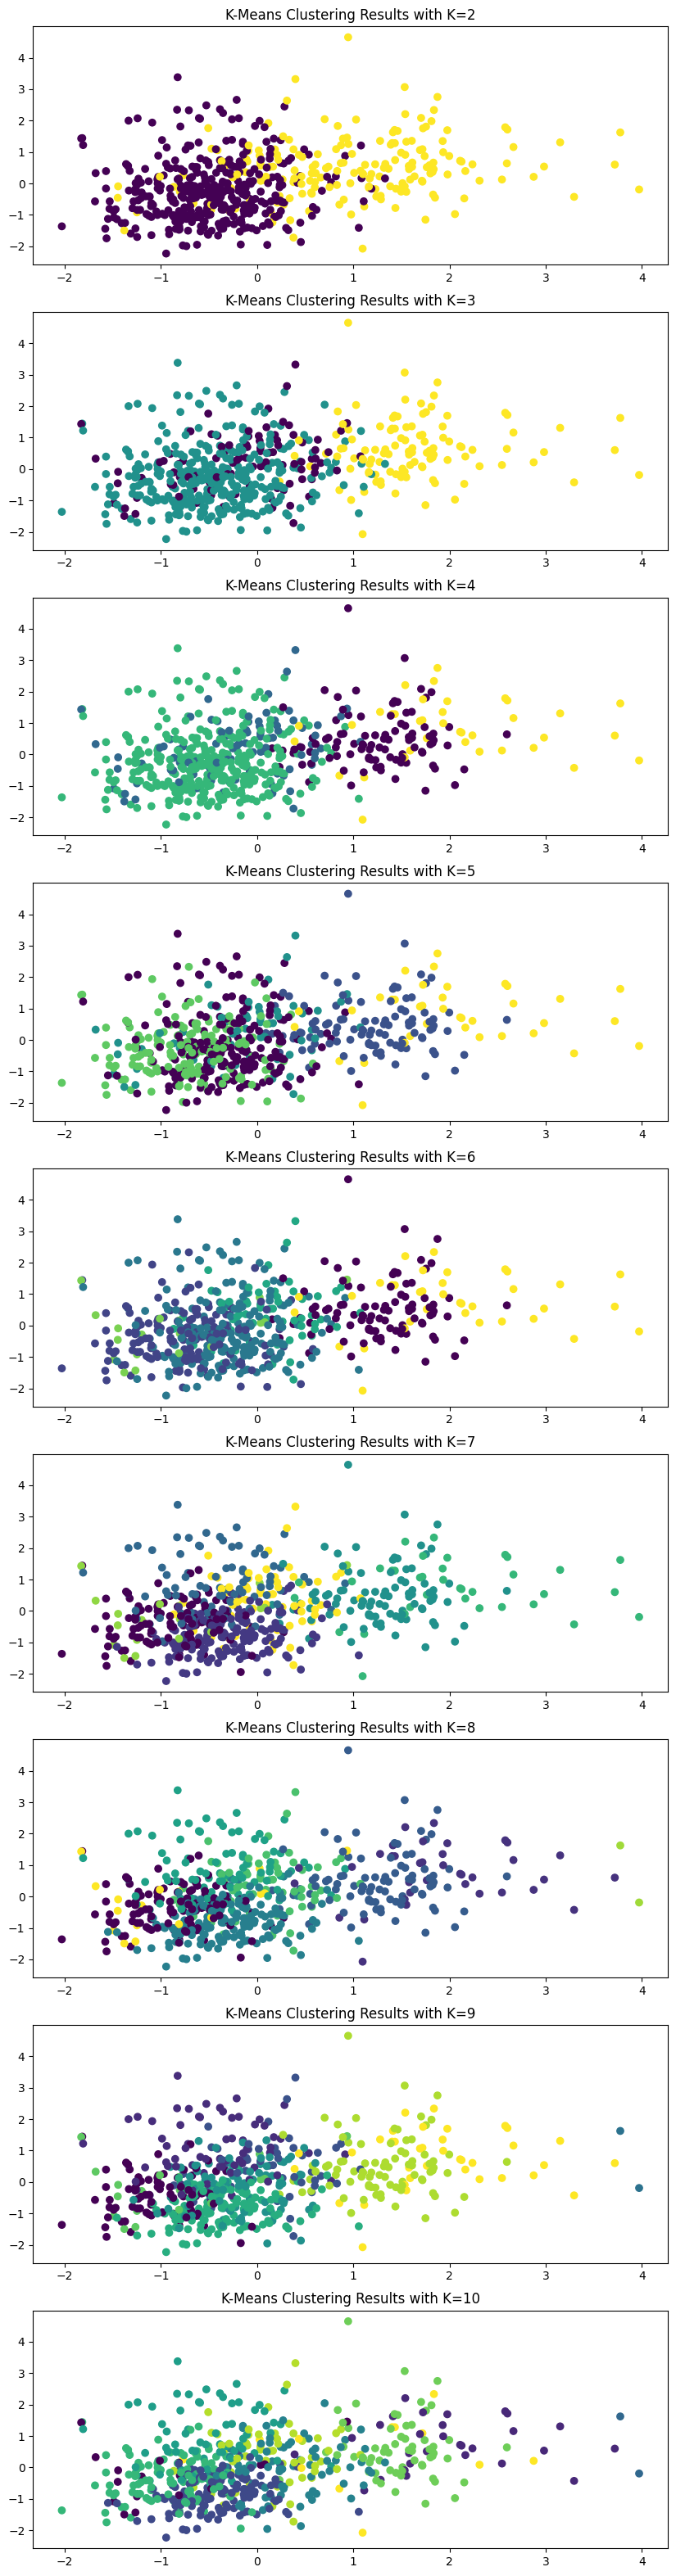

In [368]:
# Confirm that unscaled_data are just the means, se, and worst measurements
print(unscaled_data.columns)

# Scale data
scaler = StandardScaler(with_std=True,
                        with_mean=True)
scaled_data = scaler.fit_transform(unscaled_data)

# Data is now mean 0 with variance 1
print("mean: ", scaled_data.mean())
print("variance: ", scaled_data.var())

# Set parameters
setseed = 1 # set.seed(1)
n_init = 100 # 100 random start

# Set up plotting
fig , axes = plt.subplots(9, 1, figsize=(10, 40))

# Perform KMeans clustering from 2 - 10
within_cluster_sum_squares = []

for k in range(2, 11):
  kmeans = KMeans(n_clusters=k,
                  random_state=setseed,
                  n_init=n_init)
  kmeans.fit(scaled_data)
  within_cluster_sum_squares.append(kmeans.inertia_) # within cluster sum squares

  ax = axes[k-2]
  ax.scatter(scaled_data[:,0], scaled_data[:,1], c=kmeans.labels_)
  ax.set_title("K-Means Clustering Results with K=%d" % k)

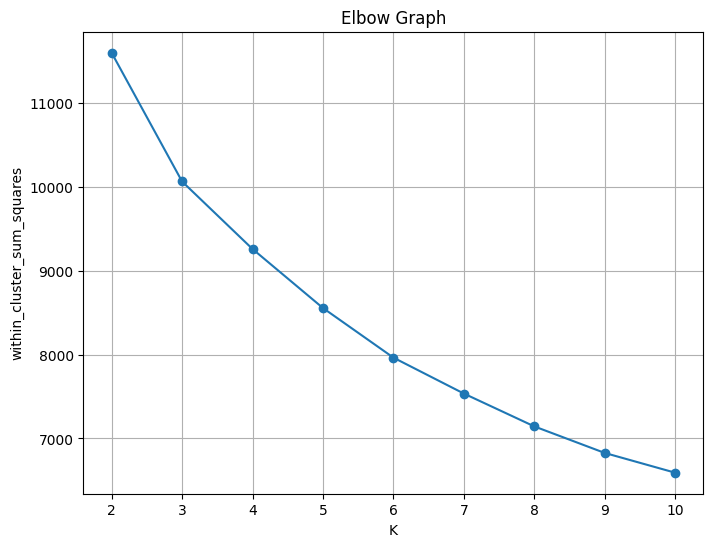

In [369]:
# Plot within_cluster_sum_squares vs. Number of Clusters
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), within_cluster_sum_squares, marker='o')
plt.xlabel('K')
plt.ylabel('within_cluster_sum_squares')
plt.title('Elbow Graph')
plt.grid(True)
plt.xticks(range(2, 11))
plt.show()

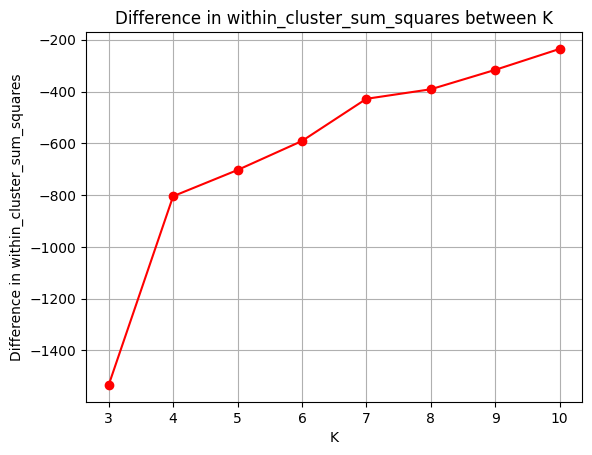

In [370]:
# Plot differences between the within_cluster_sum_squares
plt.plot(range(2, 11)[1:], np.diff(within_cluster_sum_squares), marker='o', color='red')
plt.xlabel('K')
plt.ylabel('Difference in within_cluster_sum_squares')
plt.title('Difference in within_cluster_sum_squares between K')
plt.grid(True)
plt.show()

Based on the within_cluster_sum_squares for each k cluster, it looks like Cluster 3 is the best k that provides the most informative separation. This is seen by the elbow bend in the first graph (with blue coloring) at k=3, as well as seeing it as the largest differences between within_cluster_sum_squares, where at k=3 has the highest change in sum squares distance. The consecutive Ks do not gain as much sum square difference.

## (f)

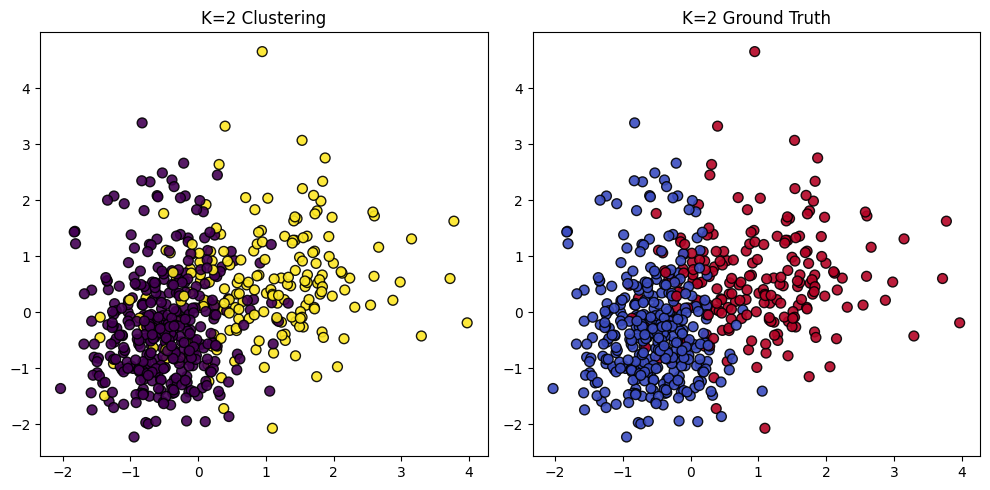

In [371]:
# Side by side plotting
fig , axes = plt.subplots(1, 2, figsize=(10, 5))

# kmeans = 2
kmeans = KMeans(n_clusters=2,
                random_state=setseed,
                n_init=n_init)
kmeans.fit(scaled_data)

ax = axes[0]
ax.scatter(scaled_data[:,0], scaled_data[:,1], c=kmeans.labels_, s=50, edgecolor='black', marker='o', alpha=0.9)
ax.set_title("K=2 Clustering");

# Ground Truth
ax = axes[1]
ax.set_title("K=2 Ground Truth");
label_mapping = {'B': 0, 'M': 1}
numeric_labels = np.array([label_mapping[label] for label in list(rawData.diagnosis)])
ax.scatter(scaled_data[:,0], scaled_data[:,1], c=numeric_labels, cmap='coolwarm', s=50, edgecolor='black', marker='o', alpha=0.9)

plt.tight_layout()
plt.show()

The left plot shows a kmeans clustering of 2 using the 30 features to generate the labels. The right plot uses the ground truth, diagnosis column, as labels with Benign as blue and Malignant as red. As you can see in the side by side plot, kmeans clustering of 2 did a really good job clustering similar ground truth labels together as both plots look very similar.

## (g)

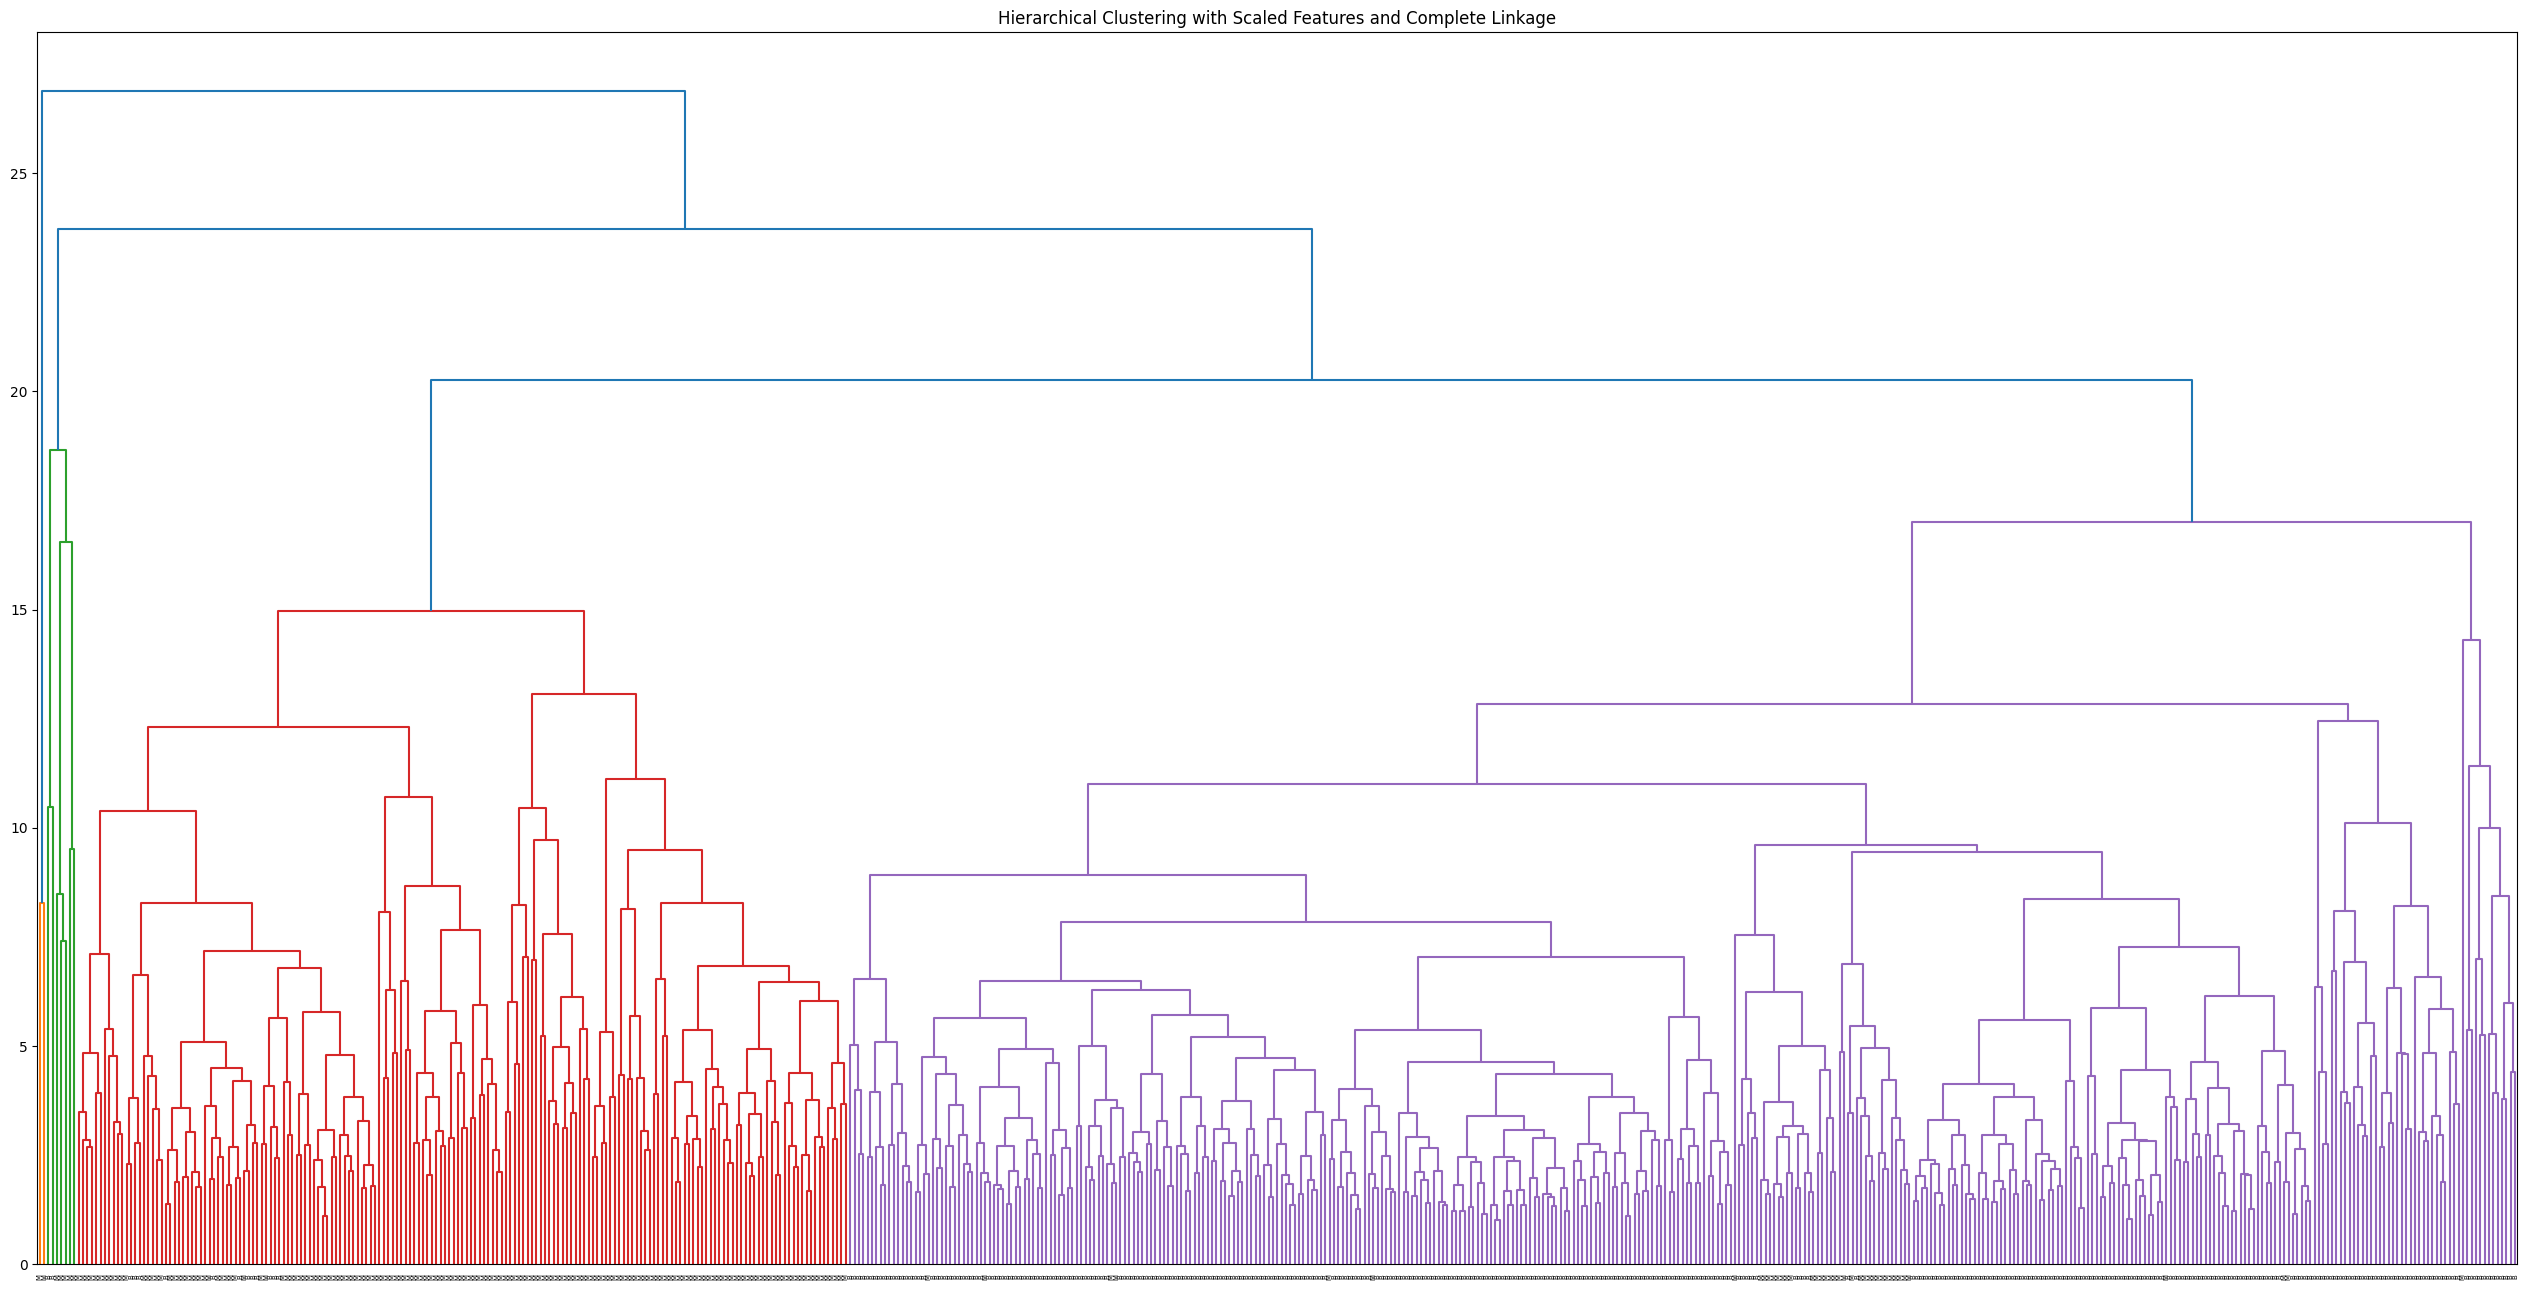

In [372]:
# Agglomerative Clustering

# Scale data
scaler = StandardScaler(with_std=True,
                        with_mean=True)
scaled_data = scaler.fit_transform(unscaled_data)

# Apply Agglomerative Clustering with complete linkage
HClust = AgglomerativeClustering
hc_comp = HClust(distance_threshold=0,
                 n_clusters=None,
                 linkage='complete').fit(scaled_data)

linkage_comp_scale = compute_linkage(hc_comp)
fig , ax = plt.subplots(1, 1, figsize=(32, 16))
dendrogram(linkage_comp_scale , ax=ax, color_threshold=20, labels=list(rawData.diagnosis)) # Cut at 20 to generate two nice clusters, with a little bit on the left

ax.set_title("Hierarchical Clustering with Scaled Features and Complete Linkage");

In [373]:
from sklearn.metrics import confusion_matrix, accuracy_score

predictions = cut_tree(linkage_comp_scale , height=20).flatten()
label_mapping = {0: 'M', 2: 'B', 3: 'O', 4: 'O', 1: 'O'}
predictions_labels = np.array([label_mapping.get(label, 'Unknown') for label in predictions])
accuracy = accuracy_score(rawData.diagnosis, predictions_labels)
print("Accuracy:", accuracy)

Accuracy: 0.8927943760984183


Since the dendrogram generates details in the graph that is a bit too small to evaluate closely, I extracted the predicted labels using cut_tree at 20, which is what is cut in the dendrogram. I then used 'accuracy_score' which is a python sklearn metrics function to compare if predictions match the ground truth, which is the diagnosis column. This ouputted an accuracy score of 89% or 89% of the predictive labels from the agglomerative clustering matched the diagonsis. This score is pretty high and supports that this method of clustering is decent at identify the correct diagonsis from just the 30 scaled features.

# Question 2

In [374]:
import numpy as np
import matplotlib.pyplot as plt

## (a)

In [375]:
# Generate random distribution of values of N(0,1) distribution, this is x
np.random.seed(setseed) # Set seed = 1
x = np.random.normal(loc=0, scale=1, size=1100) # N(0,1)

# Print first 5 values
x[:5]

array([ 1.62434536, -0.61175641, -0.52817175, -1.07296862,  0.86540763])

## (b)

In [376]:
# Generate random distrubtion of values of N(0,0.25) distribution, this is eps
np.random.seed(2) # setseed = 2
eps = np.random.normal(loc=0, scale=0.25, size=1100) # N(0,0.25)

# print first 5 values
eps[:5]

array([-0.10418946, -0.01406671, -0.53404902,  0.4100677 , -0.4483589 ])

## (c)

In [377]:
# Create vector y that follows the model
y = -1 + 0.5 * x + eps

## (d)

In [378]:
# Create train and test datasets
# First 100 set
x_train = x[:100].reshape(-1,1)
y_train = y[:100]

# Last 1000 set
x_test = x[100:].reshape(-1,1)
y_test = y[100:]

## (e)

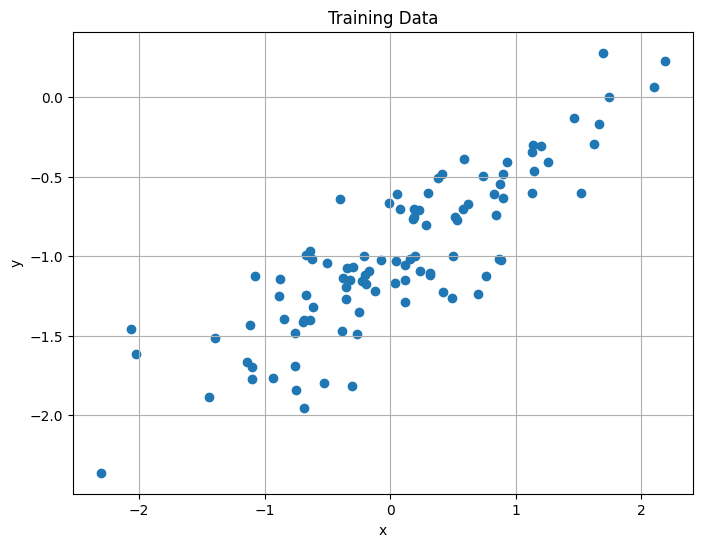

In [379]:
# Plot training data
plt.figure(figsize=(8, 6))
plt.scatter(x_train, y_train)
plt.title('Training Data')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

There is a linear relationship between x and y, which aligns with what the model we used to generate y with: y = -1 + 0.5x + eps

## (f)

In [380]:
# Fit a least squares linear model (LinearRegression)
from sklearn.linear_model import LinearRegression

# Fit model to train data
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

# Get slop and intercept of model
linear_model_slope = linear_model.coef_[0]
linear_model_intercept = linear_model.intercept_

print("Predictive_Model_Slope: ", linear_model_slope)
print("Predictive_Model_Intercept: ", linear_model_intercept)

print("True_Model_Slope: ", 0.5)
print("True_Model_Intercept: ", -1)

print("Difference_Slope: ", 0.5 - linear_model_slope)
print("Difference_Intercept: ", -1 - linear_model_intercept)

Predictive_Model_Slope:  0.4797675335408916
Predictive_Model_Intercept:  -1.0247095429480308
True_Model_Slope:  0.5
True_Model_Intercept:  -1
Difference_Slope:  0.020232466459108422
Difference_Intercept:  0.02470954294803085


The linear model trained on just the training set of 100 values generated a function that was very close to the actual. There was only a 0.02 difference between the slopes and intercepts respectively.

## (g)

In [381]:
# Evaluate the mean_squared_error
from sklearn.metrics import mean_squared_error

y_train_pred = linear_model.predict(x_train)
y_test_pred = linear_model.predict(x_test)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print("mse_train: ", mse_train)
print("mse_test: ", mse_test)

mse_train:  0.06689447606219283
mse_test:  0.06245150368422223


It is reasonable to expect the training MSE to be smaller than the test MSE because the model was trained on the training dataset, so it favors generate predictions that would be the y_train. But in this case, the mse for the test was actually slightly smaller than the mse for the training. But the difference is quite negligible at a 0.004 difference, meaning that the model is a pretty good model, which we also seen in how close the slope and intercepts were to each other.

## (h)

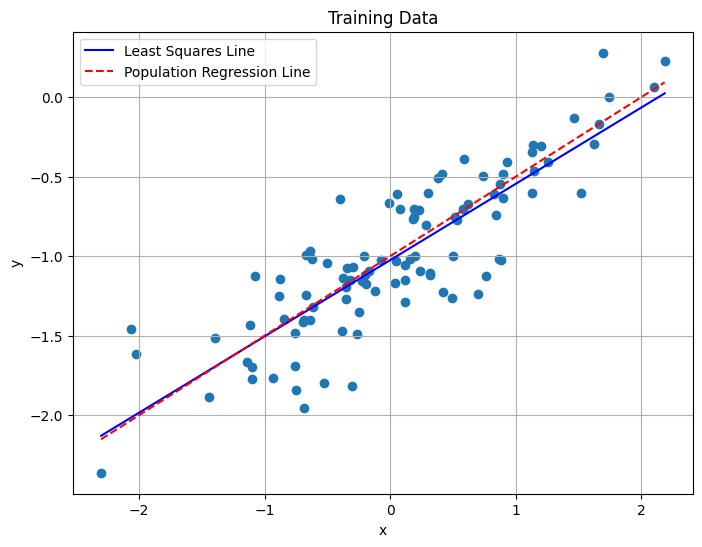

In [382]:
# Plot training data (From (e))
plt.figure(figsize=(8, 6))
plt.scatter(x_train, y_train)
plt.title('Training Data')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

# Generate predictions on training data for least squares line
x_range = np.linspace(x_train.min(), x_train.max(), 100).reshape(-1, 1) # Sorts the x_train values
y_train_pred = linear_model.predict(x_range)

# Generate population regression line (True model)
y_population = -1 + 0.5 * x_range.flatten()

# Plot least squares line onto the scatterplot
plt.plot(x_range, y_train_pred, color='blue', label='Least Squares Line')

# Plot population regression line onto the scatterplot
plt.plot(x_range, y_population, color='red', linestyle='--', label='Population Regression Line')

plt.legend()
plt.show()

## (i)

In [383]:
# Generate y predictions using a polynomial model of x and x^2 manually
y_train_poly_pred = x_train + x_train**2
y_test_poly_pred = x_test + x_test**2

# Calculate MSE for training and test sets
train_mse_poly = mean_squared_error(y_train, y_train_poly_pred.ravel())
test_mse_poly = mean_squared_error(y_test, y_test_poly_pred.ravel())

print("mse_poly_train: ", train_mse_poly)
print("mse_poly_test: ", test_mse_poly)

mse_poly_train:  4.908790238703
mse_poly_test:  6.526049753477886


I would expect the MSE for the training poly to be smaller than the MSE of the test poly. This is because there are more degrees of freedom (dof = 2) to overfit the training data. But here, the results are close since the original y_train and y_test are based off a linear model, not a polynomial model.

## (j)

In [384]:
# Fit a KNN model
from sklearn.neighbors import KNeighborsRegressor

k_values = [1, 3, 5, 10]
mse_dict = {}

for k in k_values:
  # Train Model
  knn_model = KNeighborsRegressor(n_neighbors=k)
  knn_model.fit(x_train, y_train)

  # Make predictions on the test set
  y_test_pred = knn_model.predict(x_test)

  # Compute MSE and store
  mse_value = mean_squared_error(y_test, y_test_pred)
  mse_dict[k] = mse_value

mse_dict

{1: 0.13743885875015532,
 3: 0.08588875405959635,
 5: 0.08017255212716735,
 10: 0.08098183947050945}

Based on the MSE values, a k value of 10 looks to be the best since it has the smallest MSE of 0.29

## (k)

In [385]:
# Generate random distribution of values of N(0,1) distribution, this is x
np.random.seed(3) # Set seed = 3

# Original size of training and testing dataset previously generated
print("Original Train and Test Sizes")
print(len(x_train))
print(len(y_train))
print(len(x_test))
print(len(y_test))

# Loop 10 times for N1 - N10 to create noise vectors
for i in range(10):
    noise_vector = np.random.normal(loc=0, scale=1, size=1100)

    # Split noise vector to train and test
    noise_train = noise_vector[:100].reshape(-1, 1)
    noise_test = noise_vector[100:].reshape(-1, 1)

    # Append noise to training dataset
    x_train = np.append(x_train, noise_train, axis=0)
    y_train = np.append(y_train, noise_train.flatten(), axis=0)

    # Append noise to testing dataset
    x_test = np.append(x_test, noise_test, axis=0)
    y_test = np.append(y_test, noise_test.flatten(), axis=0)

print("Noise Added Train and Test Sizes")
print(len(x_train))
print(len(y_train))
print(len(x_test))
print(len(y_test))

Original Train and Test Sizes
100
100
1000
1000
Noise Added Train and Test Sizes
1100
1100
11000
11000


In [386]:
# Fit linear regression model with new noisy training data
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

# Evaluate the mean_squared_error on testset
y_test_pred = linear_model.predict(x_test)

mse_test_linear_model = mean_squared_error(y_test, y_test_pred)
print(mse_test_linear_model)

0.11302961314148553


The previous MSE for the linear model that didn't have any noise was 0.062. The new MSE with noise is 0.113, a 0.051 increase. This is expected since the linear regession model doesn't have much flexibility to accommodate to new noise.

In [387]:
# Fit a KNN model with new noisy training data
knn_model = KNeighborsRegressor(n_neighbors=10) # k=10 was identified as best in part (j)
knn_model.fit(x_train, y_train)

# Make predictions on the test set
y_test_pred = knn_model.predict(x_test)

# Evaluate the mean_squared_error on testset
mse_test_knn_model = mean_squared_error(y_test, y_test_pred)
print(mse_test_knn_model)

0.12601989577690625


The previous MSE for the knn model at k=10 that didn't have any noise was 0.286. The new MSE with noise is 0.126, a 0.16 decrease. This decrease is somewhat expected since KNN has the flexbility to adapt to the more training data and identify through the noise, especially compared to linear regression model.